In [11]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from utils import *
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [2]:
datadir = "/root/codespace/quant-finance-lectures/amarstock_adjusted_data/daily"
top20 = get_top20_stocks(path=datadir)
top20names = [i[0] for i in top20]
print(top20names)

['00DS30', '00DSES', '00DSEX', '1JANATAMF', '1STPRIMFMF', 'AAMRANET', 'AAMRATECH', 'ABB1STMF', 'ABBANK', 'ACFL', 'ACI', 'ACIFORMULA', 'ACMELAB', 'ACTIVEFINE', 'ADNTEL', 'ADVENT', 'AFCAGRO', 'AFTABAUTO', 'AGNISYSL', 'AGRANINS']


In [3]:
# from zipline.utils.calendar_utils import get_calendar_names, register_calendar
# from exchange_calendars.exchange_calendar_xdse import XDSExchangeCalendar
# register_calendar("XDSE", XDSExchangeCalendar())
# from zipline.utils.calendar_utils import get_calendar_names
# print(get_calendar_names())

In [ ]:
startdate, enddate = 510, 960

stockname = '00DS30'
df = get_prices(stockname, path=datadir) 
volume = df.volume[startdate: enddate]
plt.plot(volume)
plt.ylabel('Volume');

In [8]:
bt = pd.read_csv('/root/codespace/quant-finance-lectures/notebooks/top20stock_backtest_result.csv', parse_dates=True)

In [9]:
bt.columns

Index(['Unnamed: 0', 'period_open', 'period_close', 'ending_exposure',
       'starting_value', 'ending_value', 'starting_cash', 'ending_cash',
       'portfolio_value', 'longs_count', 'shorts_count', 'long_value',
       'short_value', 'returns', 'long_exposure', 'pnl', 'short_exposure',
       'capital_used', 'orders', 'transactions', 'gross_leverage', 'positions',
       'net_leverage', 'starting_exposure', 'alpha', 'beta', 'sharpe',
       'sortino', 'max_drawdown', 'max_leverage', 'excess_return',
       'treasury_period_return', 'trading_days', 'period_label',
       'algorithm_period_return', 'algo_volatility', 'benchmark_period_return',
       'benchmark_volatility'],
      dtype='object')

In [10]:
benchmark_rets = bt.benchmark_period_return
bt_returns = bt.returns
bt_positions = bt.positions
bt_transactions = bt.transactions

In [12]:
print("The Sharpe Ratio of the backtest is: ", empyrical.sharpe_ratio(bt_returns))

The Sharpe Ratio of the backtest is:  0.06415226013759882


In [13]:
print("The market beta of the backtest is: ", empyrical.beta(bt_returns,benchmark_rets))

The market beta of the backtest is:  nan


In [14]:
print("The maxmimum drawdown of the backtest is: ", empyrical.max_drawdown(bt_returns))

The maxmimum drawdown of the backtest is:  -0.2903759119798289


### Plotting

/root/abenv/lib/python3.9/site-packages/pyfolio/plotting.py:835: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


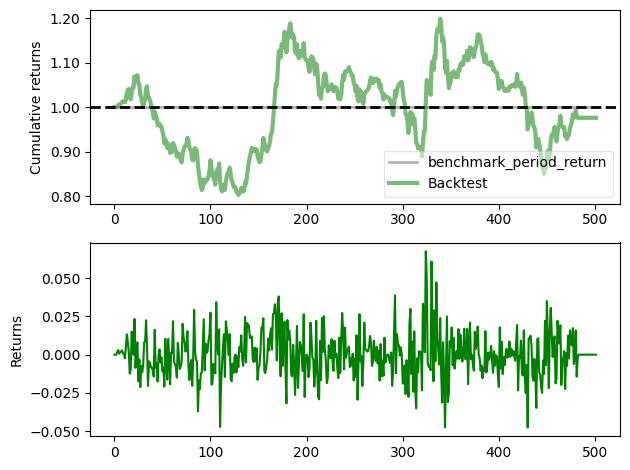

In [15]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns, benchmark_rets)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()

In [18]:
# fig = plt.figure(1)
# plt.subplot(1,3,1)
# pf.plot_annual_returns(bt_returns)
# plt.subplot(1,3,2)
# # pf.plot_monthly_returns_dist(bt_returns)
# # plt.subplot(1,3,3)
# pf.plot_monthly_returns_heatmap(bt_returns)
# plt.tight_layout()
# fig.set_size_inches(15,5)

In [21]:
# pf.plot_return_quantiles(bt_returns);

/root/abenv/lib/python3.9/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series(index=returns.index)


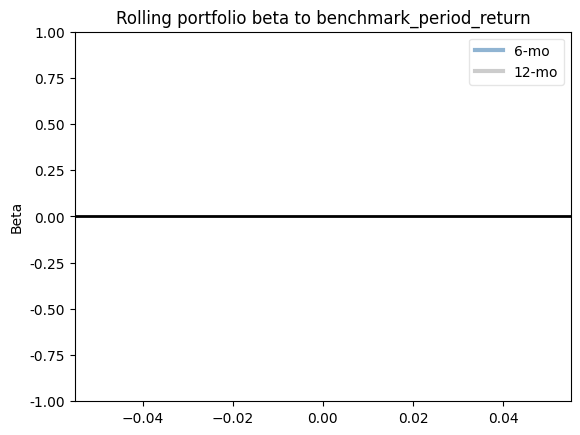

In [22]:
pf.plot_rolling_beta(bt_returns, benchmark_rets);

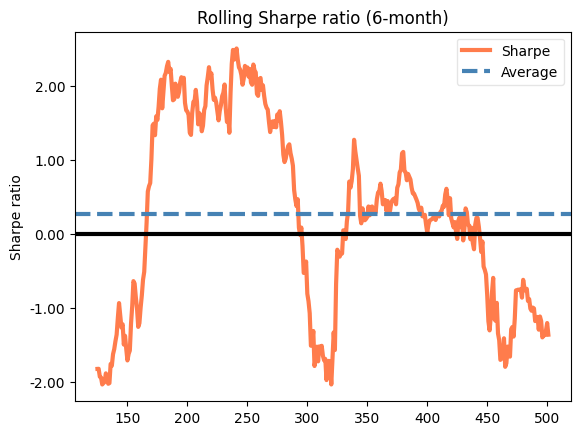

In [23]:
pf.plot_rolling_sharpe(bt_returns);

In [26]:
# pf.plot_drawdown_periods(bt_returns);

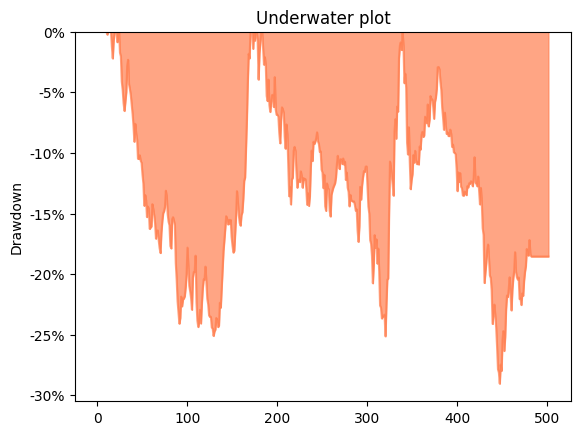

In [25]:
pf.plot_drawdown_underwater(bt_returns);

#### Gross Leverage

In [29]:
# pf.plot_gross_leverage(bt_returns, bt_positions);

In [30]:
pos_percent = pf.pos.get_percent_alloc(bt_positions)
pf.plotting.show_and_plot_top_positions(bt_returns, pos_percent);

ValueError: No axis named columns for object type Series

ValueError: No axis named columns for object type Series

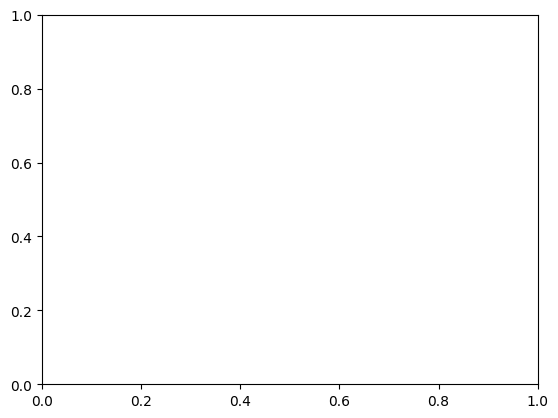

In [31]:
pf.plot_holdings(bt_returns, bt_positions);

AttributeError: 'RangeIndex' object has no attribute 'normalize'

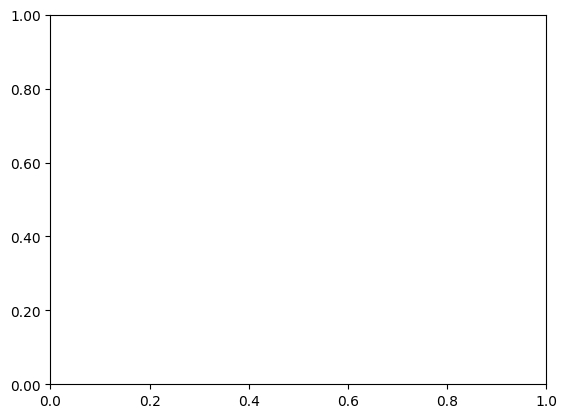

In [32]:
pf.plot_turnover(bt_returns, bt_transactions, bt_positions);